# Data Collection

We are using a dataset from kaggle for this project

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

# Visualising and analysing data

### Importing libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

ModuleNotFoundError: No module named 'xgboost'

### Read dataset

In [2]:
df = pd.read_csv("fraud detection dataset.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.drop(["isFlaggedFraud"], axis=1, inplace=True)

Here the "isFlagged" is removed as it has only 1 value i.e, 0 and is unecessary

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

We will modify the "matplotlib" plots to "ggplot" style as used in R programming. Additionally, we will also suppress any warning messages generated by matplotlib or any other libraries.

In [8]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [9]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

0 means legal transaction and 1 means fraudulent transaction

It is clearly seen that the number of legal transactions is way more than the number of fraudulent transactions which makes it an imbalanced dataset

Hence we need to balance it

In [10]:
legit = df[df["isFraud"]==0]

In [11]:
fraud = df[df["isFraud"]==1]

We shall make the number of legal transactions equal to the number of fraudulent transactions to make it even

In [12]:
legit = legit.sample(n=8213)

In [13]:
legit.shape, fraud.shape

((8213, 10), (8213, 10))

Now they are equal

In [14]:
new_df = pd.concat([legit, fraud], axis=0)

In [15]:
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6327600,688,CASH_IN,340890.55,C1199633003,133053.00,473943.55,C2120331724,0.00,0.00,0
193145,13,TRANSFER,425013.33,C1236644645,0.00,0.00,C1299038993,543817.20,968830.53,0
2434414,203,CASH_IN,226678.84,C1465693523,4189.00,230867.84,C230495819,304175.00,77496.16,0
3497936,259,TRANSFER,303654.25,C135810672,105084.17,0.00,C1129614880,505306.17,808960.42,0
1518133,153,CASH_OUT,499458.84,C243362465,798.00,0.00,C1652539689,0.00,499458.84,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [16]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6327600,688,CASH_IN,340890.55,C1199633003,133053.00,473943.55,C2120331724,0.00,0.00,0
193145,13,TRANSFER,425013.33,C1236644645,0.00,0.00,C1299038993,543817.20,968830.53,0
2434414,203,CASH_IN,226678.84,C1465693523,4189.00,230867.84,C230495819,304175.00,77496.16,0
3497936,259,TRANSFER,303654.25,C135810672,105084.17,0.00,C1129614880,505306.17,808960.42,0
1518133,153,CASH_OUT,499458.84,C243362465,798.00,0.00,C1652539689,0.00,499458.84,0


In [17]:
new_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [18]:
new_df["isFraud"].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [19]:
new_df.to_csv('balanced_dataset.csv', index=False, encoding='utf-8')

In [20]:
corr = df.corr(numeric_only=True)

In [21]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

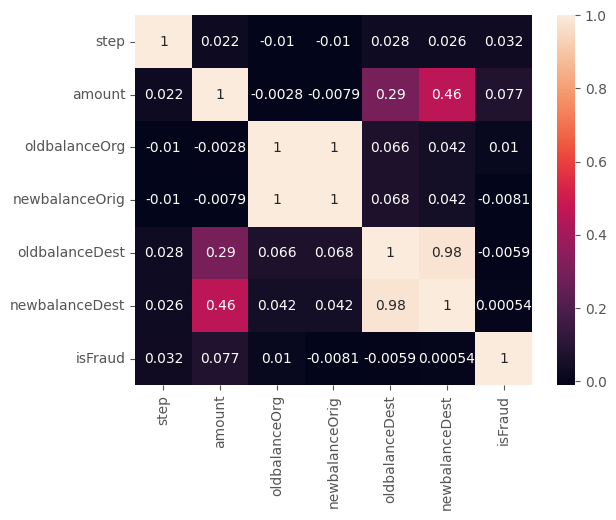

In [22]:
sns.heatmap(corr, annot=True)

### Univariate analysis

The process of understanding data with a single feature is called univariate analysis

<Axes: xlabel='step', ylabel='Count'>

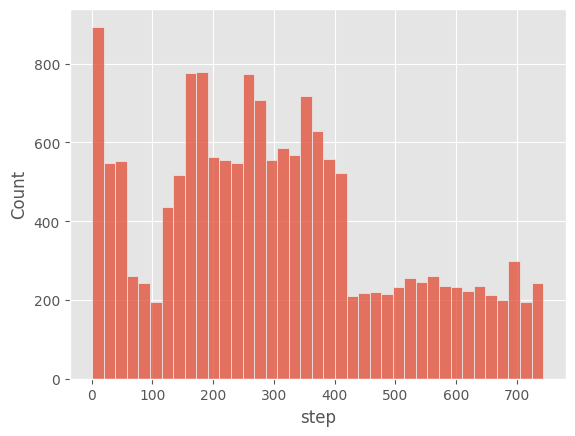

In [23]:
sns.histplot(data=new_df, x="step")

<Axes: xlabel='step'>

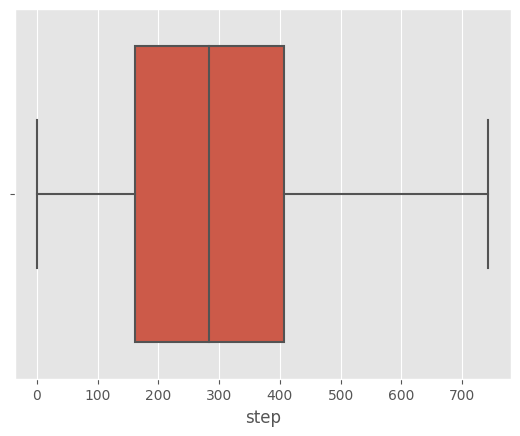

In [24]:
sns.boxplot(data=new_df, x="step")

<Axes: xlabel='type', ylabel='count'>

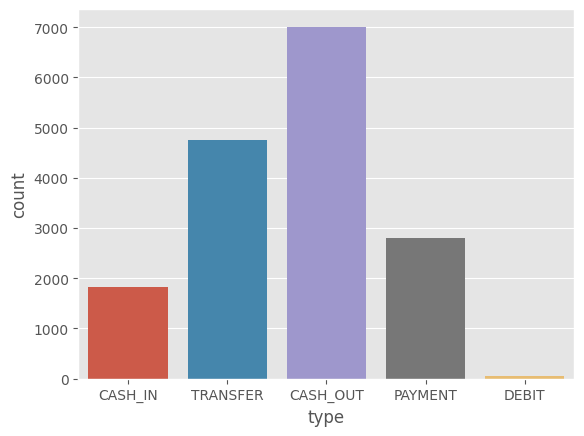

In [25]:
sns.countplot(data=new_df, x="type")

<Axes: xlabel='amount', ylabel='Count'>

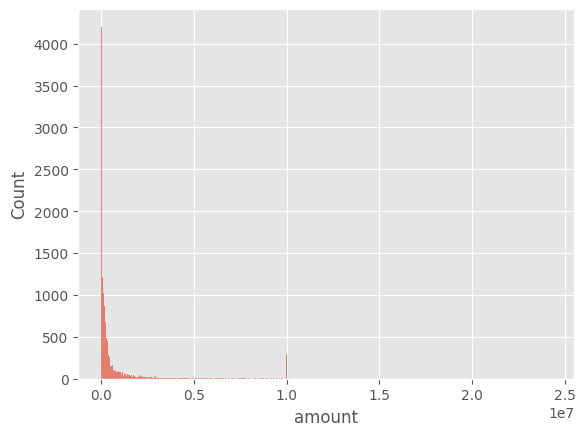

In [26]:
sns.histplot(data=new_df, x="amount")

<Axes: xlabel='amount'>

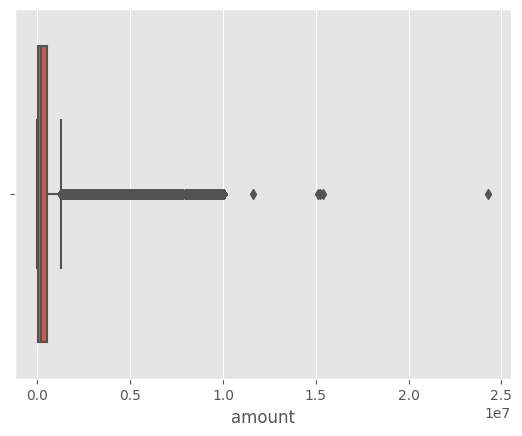

In [27]:
sns.boxplot(data=new_df, x="amount")

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

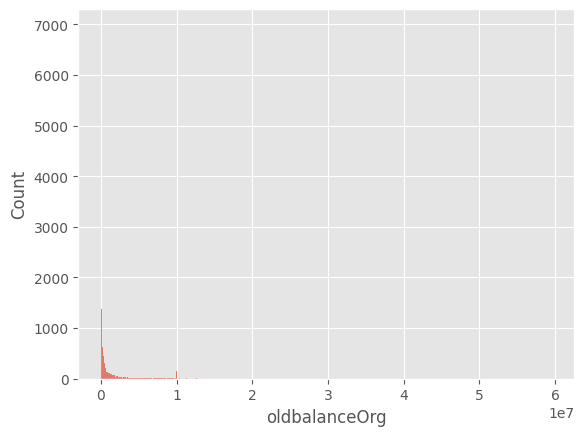

In [28]:
sns.histplot(data=new_df, x="oldbalanceOrg")

In [29]:
df["nameDest"].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

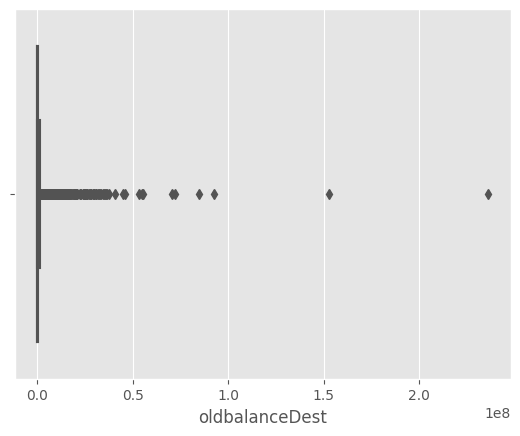

In [30]:
sns.boxplot(data=new_df, x="oldbalanceDest")

<Axes: xlabel='newbalanceDest'>

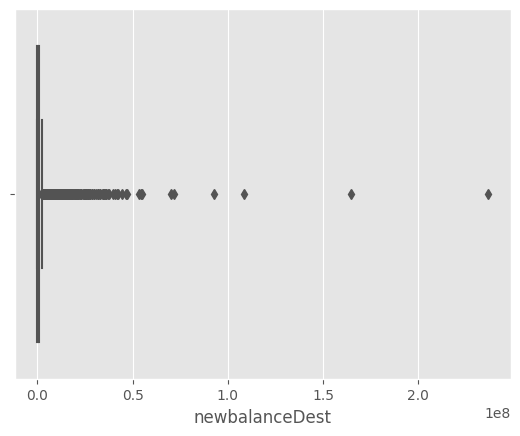

In [31]:
sns.boxplot(data=new_df, x="newbalanceDest")

<Axes: xlabel='isFraud', ylabel='count'>

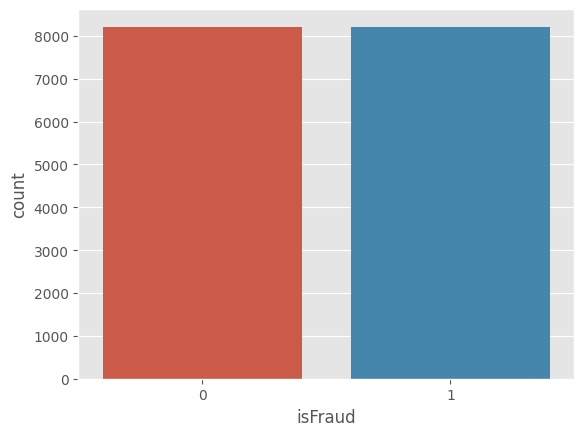

In [32]:
sns.countplot(data=new_df, x="isFraud")

### Bivariate analysis

The process of finding the relation between two features is called bivariate analysis

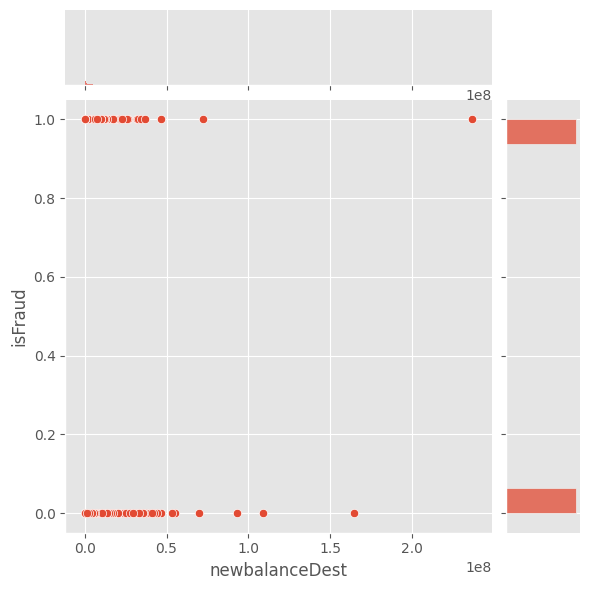

In [33]:
sns.jointplot(data=new_df, x="newbalanceDest", y="isFraud")

0 means legal transaction and 1 means fraudulent transaction

<Axes: xlabel='type', ylabel='count'>

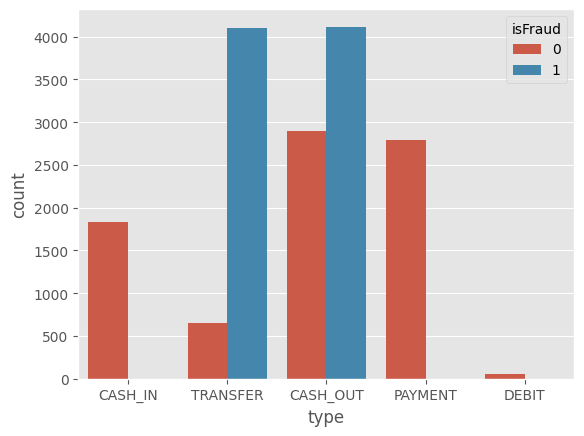

In [34]:
sns.countplot(data=new_df, x="type", hue="isFraud")

<Axes: xlabel='isFraud', ylabel='step'>

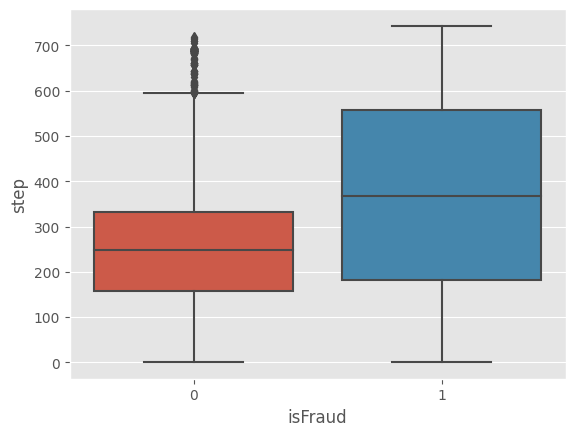

In [35]:
sns.boxplot(data=new_df, x="isFraud", y="step")

<Axes: xlabel='isFraud', ylabel='amount'>

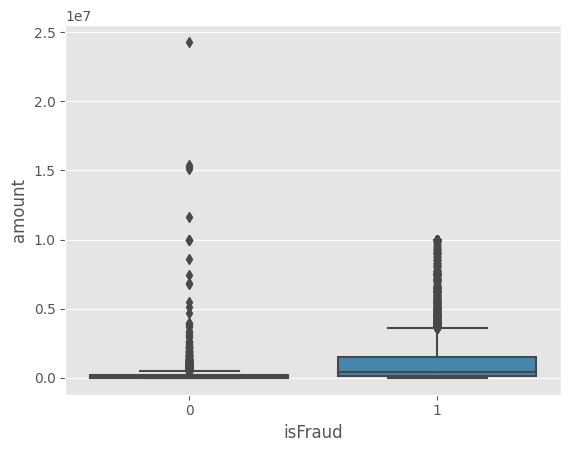

In [36]:
sns.boxplot(data=new_df, x="isFraud", y="amount")

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

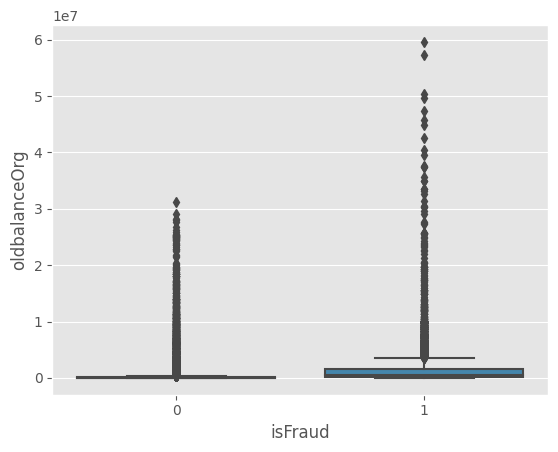

In [37]:
sns.boxplot(data=new_df, x="isFraud", y="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

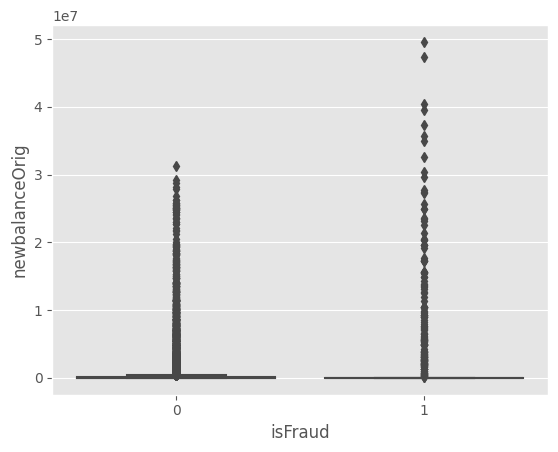

In [38]:
sns.boxplot(data=new_df, x="isFraud", y="newbalanceOrig")

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

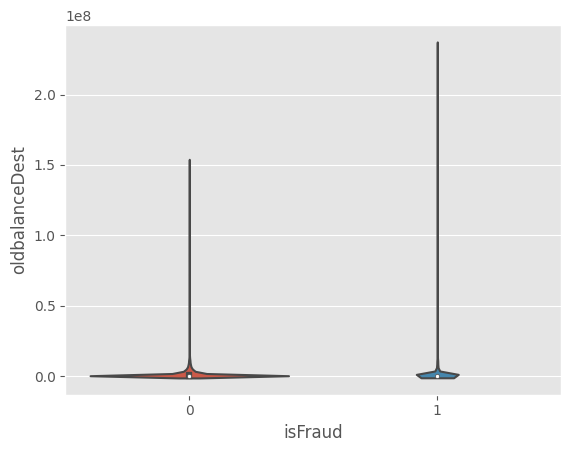

In [39]:
sns.violinplot(data=new_df, x="isFraud", y="oldbalanceDest")

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

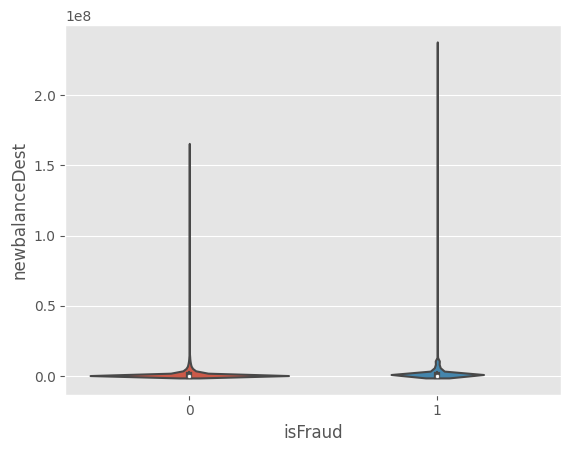

In [40]:
sns.violinplot(data=new_df, x="isFraud", y="newbalanceDest")

### Descriptive analysis

The process of studying the basic features of data with the statistical process is called descriptive analysis

In [41]:
new_df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,16426.000000,16426,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426.000000
unique,NaN,5,NaN,16426,NaN,NaN,16251,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1199633003,NaN,NaN,C52390890,NaN,NaN,NaN
freq,NaN,7008,NaN,1,NaN,NaN,3,NaN,NaN,NaN
mean,305.816206,NaN,8.205796e+05,NaN,1.242967e+06,5.266155e+05,NaN,8.318440e+05,1.257662e+06,0.500000
std,192.547123,NaN,1.862453e+06,NaN,3.262850e+06,2.520207e+06,NaN,3.516319e+06,3.936430e+06,0.500015
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,162.000000,NaN,3.733169e+04,NaN,1.038800e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,283.000000,NaN,1.711255e+05,NaN,1.179513e+05,0.000000e+00,NaN,0.000000e+00,1.180726e+05,0.500000
75%,407.000000,NaN,5.383997e+05,NaN,8.028996e+05,0.000000e+00,NaN,5.058677e+05,1.058149e+06,1.000000


# Data preprocessing

In [42]:
new_df.shape

(16426, 10)

In [43]:
new_df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [44]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6327600,688,CASH_IN,340890.55,133053.00,473943.55,0.00,0.00,0
193145,13,TRANSFER,425013.33,0.00,0.00,543817.20,968830.53,0
2434414,203,CASH_IN,226678.84,4189.00,230867.84,304175.00,77496.16,0
3497936,259,TRANSFER,303654.25,105084.17,0.00,505306.17,808960.42,0
1518133,153,CASH_OUT,499458.84,798.00,0.00,0.00,499458.84,0


In [45]:
new_df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,850002.52,0.0,6510099.11,7360101.63,1


### Checking null values

In [46]:
new_df.isnull().any()

step              False
type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

In [47]:
new_df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Clearly there are no null values

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 6327600 to 6362619
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ MB


### Handling outliers

<Axes: xlabel='amount'>

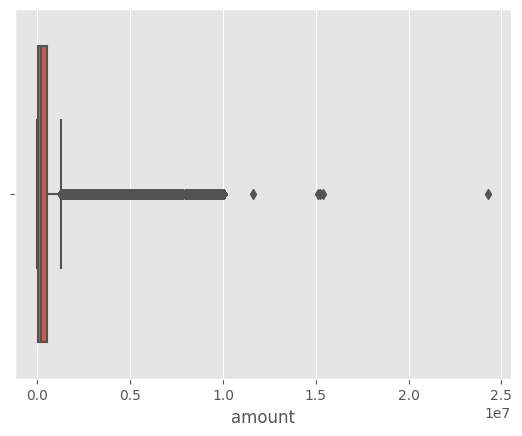

In [49]:
sns.boxplot(x=new_df["amount"])

There are outliers in the "amount" column which need to be removed

In [50]:
q1 = new_df['amount'].quantile(0.25)
q3 = new_df['amount'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['amount'].mean()

# Replace outliers with the mean value
new_df['amount'] = np.where(new_df['amount'] > upper_limit, mean, new_df['amount'])
new_df['amount'] = np.where(new_df['amount'] < lower_limit, mean, new_df['amount'])


<Axes: xlabel='amount'>

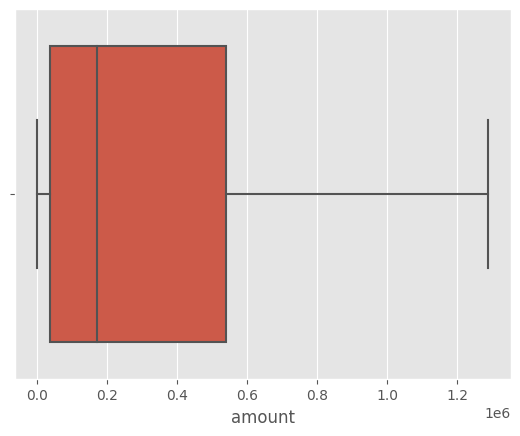

In [51]:
sns.boxplot(x=new_df["amount"])

Now outliers are removed in "amount" columns

<Axes: xlabel='oldbalanceOrg'>

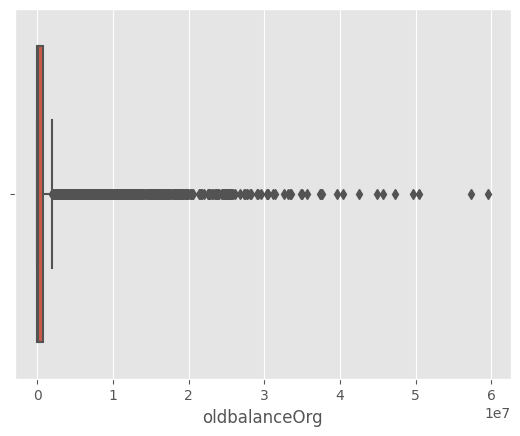

In [52]:
sns.boxplot(x=new_df["oldbalanceOrg"])

The column "oldbalanceOrg" has outliers which need to be treated

In [53]:
q1 = new_df['oldbalanceOrg'].quantile(0.25)
q3 = new_df['oldbalanceOrg'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['oldbalanceOrg'].mean()

# Replace outliers with the mean value
new_df['oldbalanceOrg'] = np.where(new_df['oldbalanceOrg'] > upper_limit, mean, new_df['oldbalanceOrg'])
new_df['oldbalanceOrg'] = np.where(new_df['oldbalanceOrg'] < lower_limit, mean, new_df['oldbalanceOrg'])

<Axes: xlabel='oldbalanceOrg'>

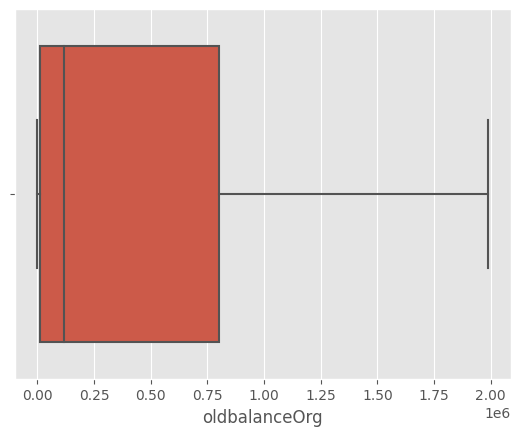

In [54]:
sns.boxplot(x=new_df["oldbalanceOrg"])

Now "oldbalanceOrg" is free of outliers

<Axes: xlabel='newbalanceOrig'>

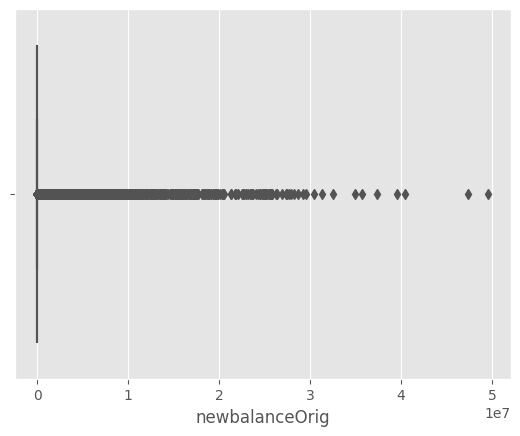

In [55]:
sns.boxplot(x=new_df["newbalanceOrig"])

The column "newbalanceOrig" has outliers which need to be treated

In [56]:
q1 = new_df['newbalanceOrig'].quantile(0.25)
q3 = new_df['newbalanceOrig'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

mean = new_df['newbalanceOrig'].mean()

# Replace outliers with the mean value
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig'] > upper_limit, mean, new_df['newbalanceOrig'])
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig'] < lower_limit, mean, new_df['newbalanceOrig'])

<Axes: xlabel='newbalanceOrig'>

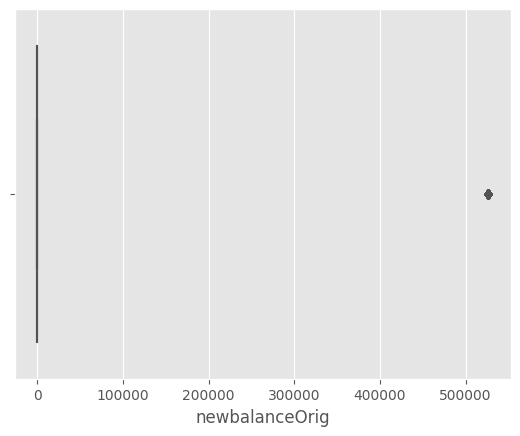

In [57]:
sns.boxplot(x=new_df["newbalanceOrig"])

Now "newbalanceOrig" is free of outliers

### Handling categorial or object data using label encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder() 

new_df["type"] = le.fit_transform(new_df["type"])

In [60]:
new_df["type"].value_counts()

type
1    7008
4    4746
3    2794
0    1828
2      50
Name: count, dtype: int64

In [61]:
le.classes_

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [62]:
map = dict(zip(le.classes_, range(len(le.classes_))))

In [63]:
map

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

### Dividing dataset into dependent and independent variable

In [64]:
x = new_df.drop("isFraud", axis=1) 
y = new_df["isFraud"]

In [65]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6327600,688,0,340890.55,133053.00,526615.540866,0.00,0.00
193145,13,4,425013.33,0.00,0.000000,543817.20,968830.53
2434414,203,0,226678.84,4189.00,526615.540866,304175.00,77496.16
3497936,259,4,303654.25,105084.17,0.000000,505306.17,808960.42
1518133,153,1,499458.84,798.00,0.000000,0.00,499458.84


In [66]:
y.head()

6327600    0
193145     0
2434414    0
3497936    0
1518133    0
Name: isFraud, dtype: int64

In [67]:
type(x)

pandas.core.frame.DataFrame

In [68]:
type(y)

pandas.core.series.Series

### Splitting data into training and testing set

In [69]:
from sklearn.model_selection import train_test_split 

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [71]:
print(x_train.shape) 
print(x_test.shape) 
print(y_test.shape)
print(y_train.shape)

(13140, 7)
(3286, 7)
(3286,)
(13140,)


# Model building

Now that our data is clean, we can train it on different models and pick the best performing model

## 1. Random forest classifier

A Random Forest is an ensemble of decision trees. It builds multiple trees from random subsets of data and features, combines their predictions, and reduces overfitting to create a robust and accurate classification model.

### Import model building libraries

In [72]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

### Initialising the model

In [73]:
rfc = RandomForestClassifier() 
rfc

RandomForestClassifier()

### Training and testing the model

In [74]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
# testing accuracy

y_test_predict1 = rfc.predict(x_test) 
test_accuracy = accuracy_score(y_test, y_test_predict1) 
test_accuracy

0.9911746804625685

In [76]:
# training accuracy 

y_train_predict1 = rfc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict1) 
train_accuracy

1.0

### Evaluating performance of the model

In [77]:
pd.crosstab(y_test, y_test_predict1)

col_0,0,1
isFraud,,
0,1609,21
1,8,1648


In [78]:
print(classification_report(y_test, y_test_predict1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1630
           1       0.99      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



## 2. Decision trees

A Decision Tree is a tree-like model that makes decisions by recursively splitting the data based on features, aiming to create homogeneous groups. It's a simple yet interpretable way to perform classification and regression tasks.

### Import model building libraries

In [79]:
from sklearn.tree import DecisionTreeClassifier 

### Initialising the model

In [80]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

### Training and testing the model

In [81]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
# testing accuracy

y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict2)
test_accuracy

0.992696287279367

In [83]:
# training accuracy

y_train_predict2 = dtc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict2) 
train_accuracy

1.0

### Evaluating the performance of the model

In [84]:
pd.crosstab(y_test, y_test_predict2)

col_0,0,1
isFraud,,
0,1615,15
1,9,1647


In [85]:
print(classification_report(y_test, y_test_predict2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



## 3. ExtraTrees classifier

An ExtraTrees Classifier (Extremely Randomized Trees Classifier) is an ensemble machine learning model that builds multiple decision trees with a key difference from Random Forest. It adds randomness by selecting random subsets of features and choosing the best split points, which makes it computationally efficient. It combines the predictions from these trees to make accurate classifications and reduce overfitting.

### Import model building libraries

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

### Initialising the model

In [87]:
etc = ExtraTreesClassifier() 
etc

ExtraTreesClassifier()

### Training and testing the model

In [88]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [89]:
# testing accuracy

y_test_predict3 = etc.predict(x_test) 
test_accuracy = accuracy_score(y_test, y_test_predict3) 
test_accuracy

0.9893487522824103

In [90]:
# training accuracy

y_train_predict3 = etc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict3) 
train_accuracy

1.0

### Evaluating the performance of the model

In [91]:
pd.crosstab(y_test,y_test_predict3)

col_0,0,1
isFraud,,
0,1609,21
1,14,1642


In [92]:
print(classification_report (y_test,y_test_predict3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



## 4. Support vector machine classifier

A Support Vector Machine (SVM) Classifier is a powerful machine learning model used for both classification and regression tasks. It works by finding the best hyperplane that separates different classes in the data, aiming to maximize the margin between the classes. SVMs can handle linear and nonlinear data, making them effective for a wide range of applications, from image recognition to text classification.

### Import model building libraries

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Initialising the model

In [94]:
svc = SVC()
svc

SVC()

### Training and testing the model

In [95]:
svc.fit(x_train,y_train)

SVC()

In [96]:
# testing accuracy

y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.8581862446743761

In [97]:
# training accuracy

y_train_predict4 = svc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict4) 
train_accuracy

0.8534246575342466

### Evaluating the performance of the model

In [98]:
pd.crosstab(y_test,y_test_predict4)



col_0,0,1
isFraud,,
0,1609,21
1,445,1211


In [99]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(y_test, y_test_predict4))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1630
           1       0.98      0.73      0.84      1656

    accuracy                           0.86      3286
   macro avg       0.88      0.86      0.86      3286
weighted avg       0.88      0.86      0.86      3286



## 5. xgboost classifier

XGBoost (Extreme Gradient Boosting) Classifier is a popular and powerful machine learning algorithm known for its accuracy and speed. It belongs to the gradient boosting family and combines the predictions of multiple weak learners (typically decision trees) in an iterative manner. XGBoost is designed to minimize prediction errors and can handle complex datasets, making it a top choice for various classification tasks.

### Import model building libraries

In [100]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

### Initialising the model

In [101]:
xgb1 = xgb.XGBClassifier()
xgb1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Training and testing the model

In [102]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
# testing accuracy

y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict5)
test_accuracy

0.9936092513694461

In [104]:
# training accuracy

y_train_predict5 = svc.predict(x_train) 
train_accuracy = accuracy_score(y_train, y_train_predict5) 
train_accuracy

0.8534246575342466

### Evaluating the performance of the model

In [105]:
pd.crosstab(y_test, y_test_predict5)

col_0,0,1
isFraud,,
0,1615,15
1,6,1650


In [106]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report (y_test, y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1630
           1       0.99      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



## Comparing models

In [107]:
def compareModel():
    print("Train accuracy for RFC: ", accuracy_score(y_train_predict1,y_train)*100) 
    print("Test accuracy for RFC: ", accuracy_score(y_test_predict1,y_test)*100) 
    print("\n")
    print("Train accuracy for DTC: ", accuracy_score(y_train_predict2,y_train)*100) 
    print("Test accuracy for DTC: ", accuracy_score(y_test_predict2,y_test)*100) 
    print("\n")
    print("Train accuracy for ETC: ", accuracy_score(y_train_predict3,y_train)*100) 
    print("Test accuracy for ETC: ", accuracy_score (y_test_predict3,y_test)*100) 
    print("\n")
    print("Train accuracy for SVC: ", accuracy_score(y_train_predict4,y_train)*100) 
    print("Test accuracy for SVC: ", accuracy_score(y_test_predict4,y_test)*100) 
    print("\n")
    print("Train accuracy for XGB: ", accuracy_score(y_train_predict5,y_train)*100) 
    print("Test accuracy for XGB: ", accuracy_score(y_test_predict5,y_test)*100)


In [108]:
compareModel()

Train accuracy for RFC:  100.0
Test accuracy for RFC:  99.11746804625685


Train accuracy for DTC:  100.0
Test accuracy for DTC:  99.26962872793669


Train accuracy for ETC:  100.0
Test accuracy for ETC:  98.93487522824103


Train accuracy for SVC:  85.34246575342466
Test accuracy for SVC:  85.81862446743762


Train accuracy for XGB:  85.34246575342466
Test accuracy for XGB:  99.36092513694462


On comparing the training and testing of 5 different models trained by 5 different algorithms, we have found that XGBoost Classifier is the best model as it has the highest testing accuracy and is not overfitting. 

## Save the model

In [109]:
import pickle 
pickle.dump(xgb1, open('payments.pkl', 'wb'))